In [2]:
import sys, os
import numpy as np
import pandas as pd
import photoz_utils
import random
import h5py
import matplotlib.pyplot as plt
from astropy.io import fits
from tqdm import tqdm

In [3]:
photozdata = pd.read_csv('/data/HSC/HSC_v6/HSC_v6.csv')
photozdata.describe()

b = np.argsort(photozdata['object_id'])
sorted_photozdata = photozdata.iloc[b][:]
photozdata = sorted_photozdata

In [4]:
for (columnName, columnData) in photozdata.iteritems():
    print(columnName)

object_id
specz_redshift_err
specz_redshift
specz_mag_i
specz_name
specz_ra
specz_dec
specz_flag_homogeneous
ra
dec
coord
skymap_id
g_cmodel_mag
r_cmodel_mag
i_cmodel_mag
z_cmodel_mag
y_cmodel_mag
g_cmodel_magsigma
r_cmodel_magsigma
i_cmodel_magsigma
z_cmodel_magsigma
y_cmodel_magsigma


/tmp/ipykernel_2444131/3463937130.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


In [5]:
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]
size = len(object_id_original)

start_index = (127 - 64) // 2
end_index = start_index + 64

In [6]:
# indices = random.sample(list(np.arange(size)), ntrain + ntest + nval)

In [7]:
ntrain_large = 204573
ntest_large = 40914
nval_large = 40914
if ntrain_large + ntest_large + nval_large != size:
    print('error!')

In [8]:
indices = np.load('datasplit_indices.npy')

In [9]:
inds_train_large = np.sort(indices[: ntrain_large])
inds_test_large = np.sort(indices[ntrain_large : ntrain_large + ntest_large])
inds_val_large = np.sort(indices[ntrain_large + ntest_large :])

In [13]:
hf_split = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_training_small.hdf5', 'r')

In [11]:
tmp = list(hf_split['specz_redshift'])

KeyboardInterrupt: 

In [14]:
tmp = list(hf_split['image'])[0:10]

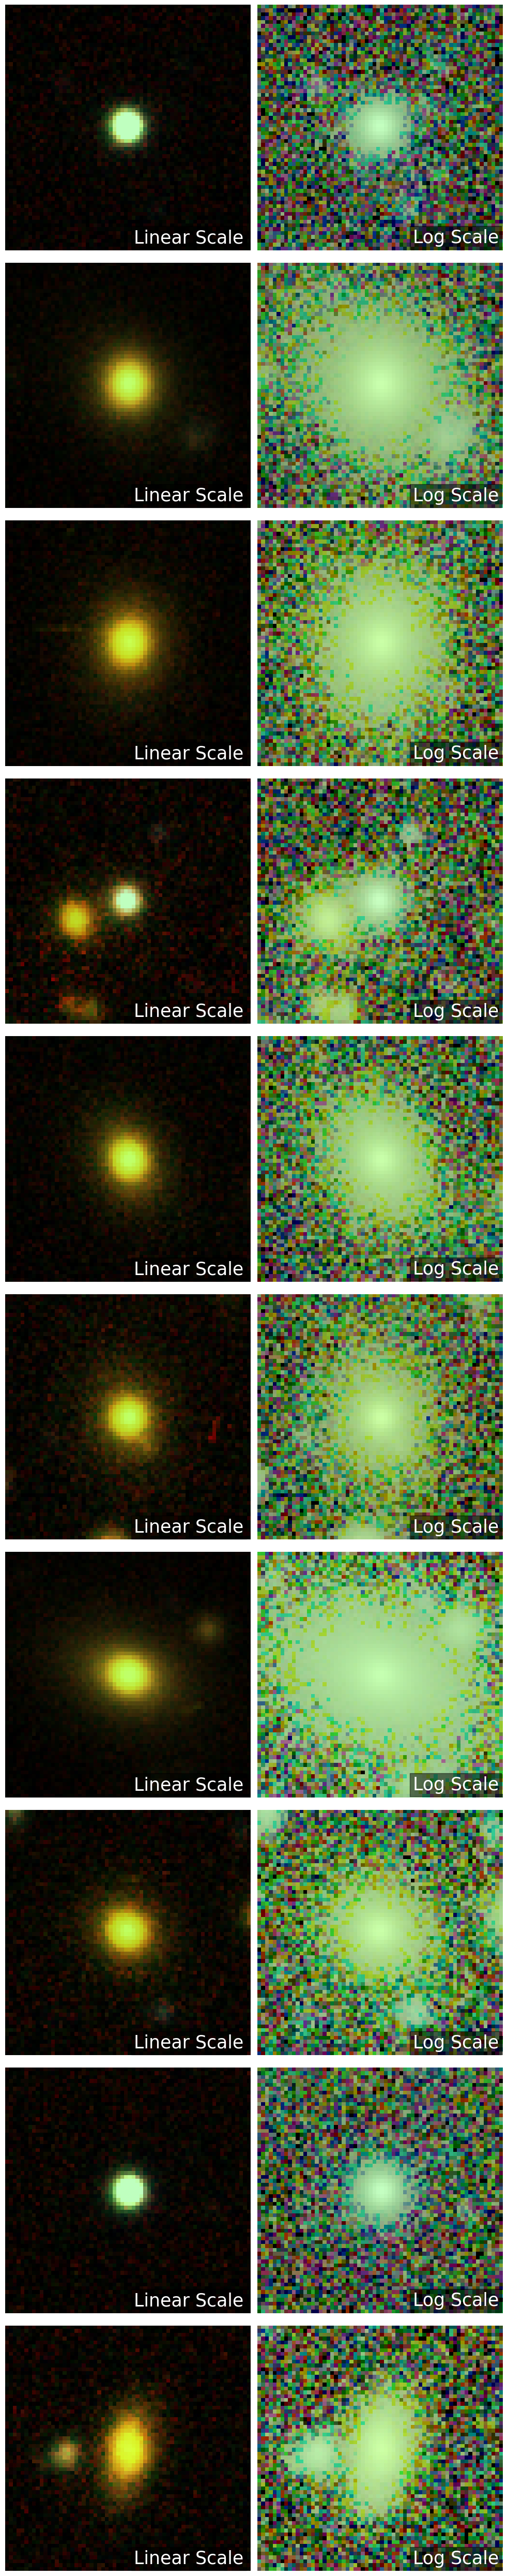

In [15]:
photoz_utils.false_color_plot(tmp)

In [15]:
hf_split.keys()

<KeysViewHDF5 ['coord', 'dec', 'g_cmodel_mag', 'g_cmodel_magsigma', 'i_cmodel_mag', 'i_cmodel_magsigma', 'image', 'object_id', 'r_cmodel_mag', 'r_cmodel_magsigma', 'ra', 'skymap_id', 'specz_dec', 'specz_flag_homogeneous', 'specz_mag_i', 'specz_name', 'specz_ra', 'specz_redshift', 'specz_redshift_err', 'y_cmodel_mag', 'y_cmodel_magsigma', 'z_cmodel_mag', 'z_cmodel_magsigma']>

In [26]:
bins = np.arange(0, 4, 0.5)

inds_list = [inds_train_large, inds_test_large, inds_val_large]

inds_train = np.array([])
inds_test = np.array([])
inds_val = np.array([])

bins_count = 0 # counting how many bins have been collected in total

for inds, z_bin in zip(inds_list, bins):
    tmp = list(hf_split['specz_redshift'])
    inds_temp = np.array([])
    count = 0
    for i in inds: 
        if tmp[i] > z_bin and tmp[i] < z_bin + 0.5:
            inds_temp = np.append(inds_temp, new_element)
            count = count + 1
        if count == 2000 / 8:
            break
    bins_count += 1
    if bins_count >= 1 and bins_count <= 8:
        inds_train = np.concatenate((inds_train, inds_temp))
    elif bins_count >= 9 and bins_count <= 16:
        inds_train = np.concatenate((inds_train, inds_temp))
    elif bins_count >= 17 and bins_count <= 24:
        inds_train = np.concatenate((inds_train, inds_temp))
    else:
        print('error!')

NameError: name 'new_element' is not defined

In [12]:
ntrain = 10000
ntest = 2000
nval = 2000

In [13]:
inds_train = inds_train[: ntrain]
inds_test = inds_test[: ntest]
inds_val = inds_val[: nval]

In [16]:
# np.save('datasplit_indices_small.npy', indices)

In [18]:
subsizes = [ntrain, ntest, nval]
file_ends = ['_training_small', '_testing_small', '_validation_small']
inds_list = [inds_train, inds_test, inds_val]

for subsize, file_end, inds in zip(subsizes, file_ends, inds_list):
    hf_write = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64' + file_end + '.hdf5', 'w')
    for k in hf_split.keys():
        tmp = hf_split[k]
        subshape = list(np.shape(tmp))
        subshape[0] = subsize
        dataset = hf_write.create_dataset(k, shape = subshape, dtype = tmp.dtype)
        for i, index in tqdm(enumerate(inds)):
            dataset[i] = tmp[index]
        tmp = None

hf_split.close()
hf_write.close()

10000it [00:06, 1528.81it/s]
10000it [00:01, 5939.94it/s]
10000it [00:02, 3956.96it/s]
10000it [00:02, 4524.36it/s]
10000it [00:00, 16346.23it/s]
10000it [00:00, 13800.30it/s]
10000it [00:11, 846.23it/s]
10000it [00:00, 12894.08it/s]
10000it [00:00, 18143.42it/s]
10000it [00:00, 17973.53it/s]
10000it [00:00, 16655.80it/s]
10000it [00:00, 19102.22it/s]
10000it [00:00, 16908.00it/s]
10000it [00:00, 11080.93it/s]
10000it [00:00, 16723.99it/s]
10000it [00:00, 12165.90it/s]
10000it [00:00, 17338.81it/s]
10000it [00:00, 18207.06it/s]
10000it [00:00, 18432.60it/s]
10000it [00:00, 18267.56it/s]
10000it [00:00, 18160.11it/s]
10000it [00:00, 17887.91it/s]
10000it [00:00, 18726.07it/s]
2000it [00:00, 2348.89it/s]
2000it [00:00, 15292.55it/s]
2000it [00:00, 17941.70it/s]
2000it [00:00, 17076.64it/s]
2000it [00:00, 17931.50it/s]
2000it [00:00, 17829.55it/s]
2000it [00:03, 590.41it/s]
2000it [00:00, 13630.75it/s]
2000it [00:00, 17165.29it/s]
2000it [00:00, 16741.59it/s]
2000it [00:00, 17456.81it/s]


In [19]:
hf_split = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127.hdf5', 'r')

In [20]:
subsizes = [ntrain, ntest, nval]
file_ends = ['_training_small', '_testing_small', '_validation_small']
inds_list = [inds_train, inds_test, inds_val]

for subsize, file_end, inds in zip(subsizes, file_ends, inds_list):
    hf_write = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127' + file_end + '.hdf5', 'w')
    for k in hf_split.keys():
        tmp = hf_split[k]
        subshape = list(np.shape(tmp))
        subshape[0] = subsize
        dataset = hf_write.create_dataset(k, shape = subshape, dtype = tmp.dtype)
        for i, index in tqdm(enumerate(inds)):
            dataset[i] = tmp[index]
        tmp = None

hf_split.close()
hf_write.close()

10000it [00:00, 13295.56it/s]
10000it [00:00, 19558.79it/s]
10000it [00:00, 19380.41it/s]
10000it [00:00, 19388.30it/s]
10000it [00:00, 19753.03it/s]
10000it [00:00, 21021.50it/s]
10000it [00:25, 393.88it/s]
10000it [00:00, 19598.69it/s]
10000it [00:00, 19062.36it/s]
10000it [00:00, 20230.50it/s]
10000it [00:00, 20571.39it/s]
10000it [00:00, 21069.23it/s]
10000it [00:00, 17894.02it/s]
10000it [00:01, 8127.68it/s]
10000it [00:00, 19370.08it/s]
10000it [00:01, 9070.17it/s]
10000it [00:00, 16952.36it/s]
10000it [00:00, 12442.09it/s]
10000it [00:01, 8877.57it/s]
10000it [00:00, 10096.05it/s]
10000it [00:00, 15711.88it/s]
10000it [00:00, 10340.07it/s]
10000it [00:00, 14288.50it/s]
2000it [00:00, 13754.75it/s]
2000it [00:00, 21418.42it/s]
2000it [00:00, 20888.07it/s]
2000it [00:00, 21053.95it/s]
2000it [00:00, 20555.02it/s]
2000it [00:00, 20935.98it/s]
2000it [00:21, 95.12it/s] 
2000it [00:00, 22550.45it/s]
2000it [00:00, 21826.58it/s]
2000it [00:00, 21585.02it/s]
2000it [00:00, 21634.68it/s

In [ ]:
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]
size = len(object_id_original)

start_index = (127 - 64) // 2
end_index = start_index + 64

In [21]:
hf_train_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_training_small.hdf5', 'r')
hf_train_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_training_small.hdf5', 'r')

In [22]:
# Check data maching
for (columnName, columnData) in tqdm(photozdata.iteritems()):
    # print(np.asarray(hf_original[columnName])[..., None][0:2])
    for i in range(0, 10):
        if np.asarray(hf_train_64[columnName])[..., None][i] != np.asarray(hf_train_127[columnName])[..., None][i]:
            print('error')

0it [00:00, ?it/s]/opt/anaconda3/envs/jupyterhub/lib/python3.10/site-packages/tqdm/std.py:1182: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for obj in iterable:
22it [00:00, 342.26it/s]


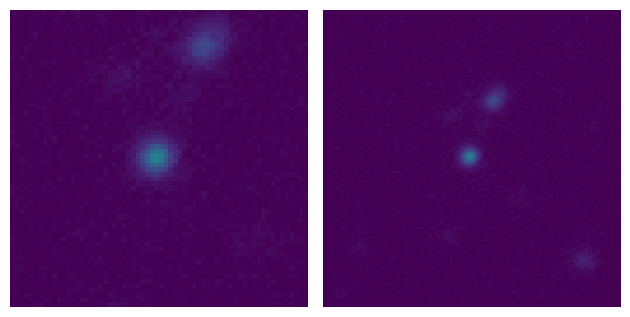

In [23]:
# Check image maching
index_to_show = 400
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

axes[0].imshow(hf_train_64['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[0].axis('off')

axes[1].imshow(hf_train_127['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

22it [00:00, 347.99it/s]


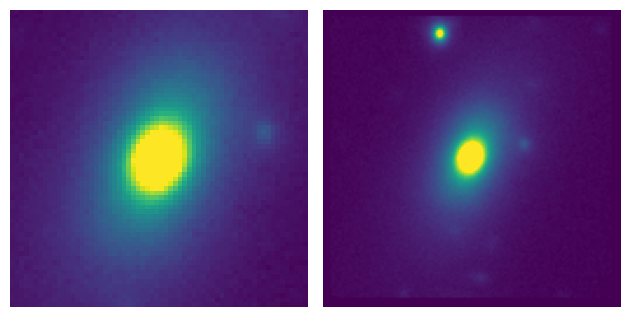

In [24]:
hf_test_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_testing_small.hdf5', 'r')
hf_test_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_testing_small.hdf5', 'r')

# Check data maching
for (columnName, columnData) in tqdm(photozdata.iteritems()):
    # print(np.asarray(hf_original[columnName])[..., None][0:2])
    for i in range(0, 10):
        if np.asarray(hf_test_64[columnName])[..., None][i] != np.asarray(hf_test_127[columnName])[..., None][i]:
            print('error')
            
# Check image maching
index_to_show = 400
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

axes[0].imshow(hf_test_64['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[0].axis('off')

axes[1].imshow(hf_test_127['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

22it [00:00, 355.87it/s]


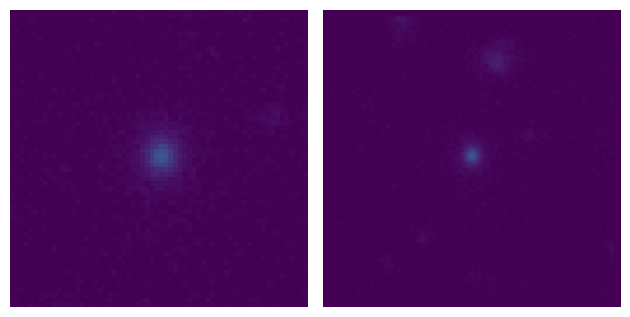

In [25]:
hf_val_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_validation_small.hdf5', 'r')
hf_val_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_validation_small.hdf5', 'r')

# Check data maching
for (columnName, columnData) in tqdm(photozdata.iteritems()):
    # print(np.asarray(hf_original[columnName])[..., None][0:2])
    for i in range(0, 10):
        if np.asarray(hf_val_64[columnName])[..., None][i] != np.asarray(hf_val_127[columnName])[..., None][i]:
            print('error')
            
# Check image maching
index_to_show = 400
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

axes[0].imshow(hf_val_64['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[0].axis('off')

axes[1].imshow(hf_val_127['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [26]:
# Check metadata
hf_val_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_validation_small.hdf5', 'r')
hf_val_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_validation_small.hdf5', 'r')

for i in [random.randint(0, nval) for _ in range(10)]:
    print(i)
    object_id_64 = np.asarray(hf_val_64['object_id'][0:])[..., None][i][0]
    object_id_127 = np.asarray(hf_val_127['object_id'][0:])[..., None][i][0]
    for j in range(len(photozdata['object_id'])):
        if photozdata['object_id'][j] == object_id_64:
            if photozdata['object_id'][j] != object_id_64:
                print('error')
            for (columnName, columnData) in photozdata.iteritems():
                if columnName == 'specz_name' or columnName == 'coord': 
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_val_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_val_127[columnName][0:])[..., None][i][0]:
                        print('error')
                else:
                    if photozdata[columnName][j] != np.asarray(hf_val_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if photozdata[columnName][j] != np.asarray(hf_val_127[columnName][0:])[..., None][i][0]:
                        print('error')

211


/tmp/ipykernel_879290/1824593901.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


1922
1283
677
323
1799
223
112
1856
1963


In [27]:
# Check metadata
hf_test_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_testing_small.hdf5', 'r')
hf_test_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_testing_small.hdf5', 'r')

for i in [random.randint(0, ntest) for _ in range(10)]:
    print(i)
    object_id_64 = np.asarray(hf_test_64['object_id'][0:])[..., None][i][0]
    object_id_127 = np.asarray(hf_test_127['object_id'][0:])[..., None][i][0]
    for j in range(len(photozdata['object_id'])):
        if photozdata['object_id'][j] == object_id_64:
            if photozdata['object_id'][j] != object_id_64:
                print('error')
            for (columnName, columnData) in photozdata.iteritems():
                if columnName == 'specz_name' or columnName == 'coord': 
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_test_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_test_127[columnName][0:])[..., None][i][0]:
                        print('error')
                else:
                    if photozdata[columnName][j] != np.asarray(hf_test_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if photozdata[columnName][j] != np.asarray(hf_test_127[columnName][0:])[..., None][i][0]:
                        print('error')

1155


/tmp/ipykernel_879290/2081428329.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


1764
1618
94
934
236
65
588
287
1424


In [28]:
# Check metadata
hf_train_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_training_small.hdf5', 'r')
hf_train_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_training_small.hdf5', 'r')

for i in [random.randint(0, ntrain) for _ in range(10)]:
    print(i)
    object_id_64 = np.asarray(hf_train_64['object_id'][0:])[..., None][i][0]
    object_id_127 = np.asarray(hf_train_127['object_id'][0:])[..., None][i][0]
    for j in range(len(photozdata['object_id'])):
        if photozdata['object_id'][j] == object_id_64:
            if photozdata['object_id'][j] != object_id_64:
                print('error')
            for (columnName, columnData) in photozdata.iteritems():
                if columnName == 'specz_name' or columnName == 'coord': 
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_train_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_train_127[columnName][0:])[..., None][i][0]:
                        print('error')
                else:
                    if photozdata[columnName][j] != np.asarray(hf_train_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if photozdata[columnName][j] != np.asarray(hf_train_127[columnName][0:])[..., None][i][0]:
                        print('error')

6236


/tmp/ipykernel_879290/2300915987.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


187
4947
5840
3747
6317
7291
3058
8131
9154


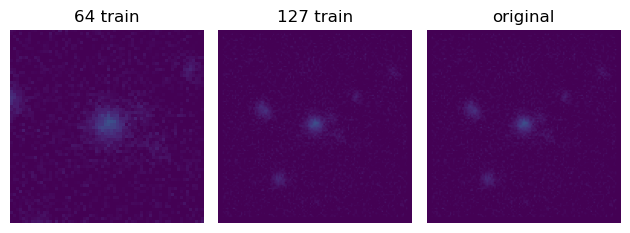

In [29]:
# Check image
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]

i = random.randint(0, ntrain)

object_id_64 = np.asarray(hf_train_64['object_id'][0:])[..., None][i][0]
object_id_127 = np.asarray(hf_train_127['object_id'][0:])[..., None][i][0]

for j in range(len(object_id_original)):
    if object_id_original[j] == object_id_64:
        if object_id_original[j] != object_id_127:
            print('error')
        original_index = j

fig, axes = plt.subplots(1, 3)  # 1 row, 2 columns

axes[0].imshow(hf_train_64['image'][i][0], vmin = 0, vmax = 4.16)
axes[0].set_title('64 train')
axes[0].axis('off')

axes[1].imshow(hf_train_127['image'][i][0], vmin = 0, vmax = 4.16)
axes[1].set_title('127 train')
axes[1].axis('off')

axes[2].imshow(hf_original['image'][original_index][0], vmin = 0, vmax = 4.16)
axes[2].set_title('original')
axes[2].axis('off')

plt.tight_layout()
plt.show()

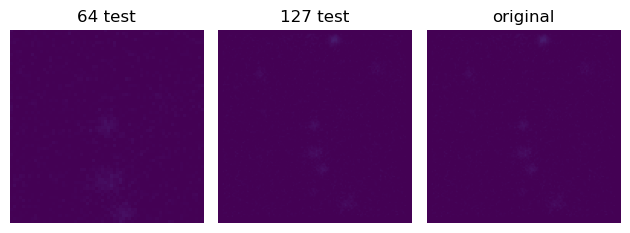

In [30]:
# Check image
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]

i = random.randint(0, ntest)

object_id_64 = np.asarray(hf_test_64['object_id'][0:])[..., None][i][0]
object_id_127 = np.asarray(hf_test_127['object_id'][0:])[..., None][i][0]

for j in range(len(object_id_original)):
    if object_id_original[j] == object_id_64:
        if object_id_original[j] != object_id_127:
            print('error')
        original_index = j

fig, axes = plt.subplots(1, 3)  # 1 row, 2 columns

axes[0].imshow(hf_test_64['image'][i][0], vmin = 0, vmax = 4.16)
axes[0].set_title('64 test')
axes[0].axis('off')

axes[1].imshow(hf_test_127['image'][i][0], vmin = 0, vmax = 4.16)
axes[1].set_title('127 test')
axes[1].axis('off')

axes[2].imshow(hf_original['image'][original_index][0], vmin = 0, vmax = 4.16)
axes[2].set_title('original')
axes[2].axis('off')

plt.tight_layout()
plt.show()

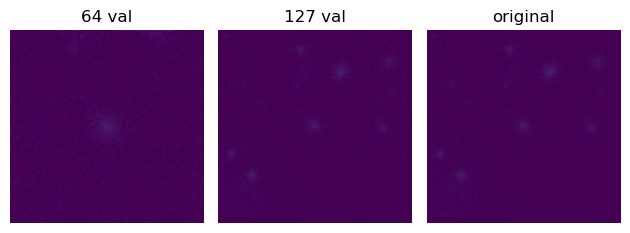

In [31]:
# Check image
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]

i = random.randint(0, nval)

object_id_64 = np.asarray(hf_val_64['object_id'][0:])[..., None][i][0]
object_id_127 = np.asarray(hf_val_127['object_id'][0:])[..., None][i][0]

for j in range(len(object_id_original)):
    if object_id_original[j] == object_id_64:
        if object_id_original[j] != object_id_127:
            print('error')
        original_index = j

fig, axes = plt.subplots(1, 3)  # 1 row, 2 columns

axes[0].imshow(hf_val_64['image'][i][0], vmin = 0, vmax = 4.16)
axes[0].set_title('64 val')
axes[0].axis('off')

axes[1].imshow(hf_val_127['image'][i][0], vmin = 0, vmax = 4.16)
axes[1].set_title('127 val')
axes[1].axis('off')

axes[2].imshow(hf_original['image'][original_index][0], vmin = 0, vmax = 4.16)
axes[2].set_title('original')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [32]:
hf_original.close()
hf_train_64.close()
hf_train_127.close()
hf_test_64.close()
hf_test_127.close()
hf_val_64.close()
hf_val_127.close()

In [ ]:
# END